# **Equazioni Differenziali Ordinarie (ODE) - Parte 1: Metodi di Eulero**
Consideriamo l'evoluzione in tempo di una certa quantità scalare $y=y(t)\in\mathbb{R}$, la cui dinamica sia descritta ad un problema di Cauchy del tipo
</br></br>
$$\begin{cases}
y'(t)=f(t,y(t)) & t_0\le t\le t_{f},\\ y(0)=y_{0}.
\end{cases}
$$
</br>
Per poter risolvere numericamente il problema suddividiamo l'intervallo $I=[t_0,t_N]$ in $N$ sottointervalli con la stessa dimensione data da
</br></br>
$$
h= \dfrac{t_N-t_0}{N}
$$
</br>
e definiamo gli istanti discreti $\{t_{0},t_{1},\dots,t_{N}\}$ in cui calcoleremo la soluzione approssimata come
</br></br>
$$t_n=t_0+nh.$$
</br>
Lo scopo di un metodo numerico per l'equazioni differenziali ordinarie (ODE)  è quello di approssimare la dinamica di $y$ con una sequenza discreta $\{u_{0}=y_{0},u_{1},\dots,u_{N}\}$ tale per cui
$$u_{n}\approx y(t_{n}).$$

## 1. Il metodo di Eulero in avanti </br>
L'idea del metodo di Eulero in avanti è quella di costruire una griglia temporale equispaziata di passo $h>0$ ed approssimare la soluzione del sistema secondo lo schema iterativo sottostante
</br> </br>
$$
\begin{cases}
u_{0}=y_{0}\\u_{n+1}=u_{n}+hf(t_{n},u_{n}) & n=0,\dots,N-1
\end{cases}
$$
</br>
Tale schema è detto *esplicito* e ad un passo (*one-step*), in quanto, ad ogni passo temporale, la soluzione numerica $u_{n+1}$ dipende soltanto dalla soluzione al passo temporale precedente $u_{n}$.

<mark>**Esercizio 1**</mark></br>
Scrivere una funzione chiamata $\texttt{euleroAvanti}$ che, dati $f$, $t_0$, $t_N$, $y_0$ ed $h$, implementi il metodo di Eulero in avanti, restituendo la griglia temporale $\mathbf{t}=[t_{0},\dots,t_{N}]$ e la sequenza approssimante $\mathbf{u}=[u_{0},\dots,u_{N}]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euleroAvanti(f, t0, tN, y0, h):

  """Metodo di Eulero in avanti
  Input:
    f   (lambda function)   Termine di destra dell'ODE, passata come
                            funzione di tempo e spazio, f = f(t, y)
    t0  (float)             Tempo iniziale
    tN  (float)             Tempo finale
    y0  (float)             Dato iniziale
    h   (float)             Passo temporale

  Output:
    t   (numpy.ndarray)     Griglia temporale
    u   (numpy.ndarray)     Approssimazioni della soluzione nei nodi temporali t_i
  """

  #
  # implementazione Eulero in avanti
  #

  return t, u

## 2. Il metodo di Eulero all'indietro </br>
In alternativa al metodo di Eulero "in avanti", esiste anche una sua versione "all'indietro", la quale si basa invece sul seguente schema iterativo
</br></br>
$$\begin{cases}
u_{0}=y_{0}\\u_{n+1}=u_{n}+hf(t_{n+1},u_{n+1}) & n=0,\dots,N-1
\end{cases}$$
</br>
Tale schema è detto *implicito* e ad un passo (*one-step*), in quanto, ad ogni passo temporale, la soluzione numerica $u_{n+1}$ dipende dalla stessa incongita $u_{n+1}$, oltre che da $u_n$. Quindi, di volta in volta, bisognerà risolvere un'equazione non lineare

$$z=u_n + h f(t_{n+1}, z)$$

nella variabile incognita $z$. La soluzione di tale equazione si può approssimare, ad esempio, con il metodo del punto fisso.
</br>
</br>
Si osservi che l'utilizzo di un metodo di punto fisso richiede che il modulo della derivata della funzione di iterazione utilizzata sia minore di uno; questa condizione è generalmente soddisfatta per $h$ sufficientemente piccolo.

<mark>**Esercizio 2**</mark></br>

Importate la function $\verb|euleroIndietro|$ dallo script $\verb|utils_ODE.py|$. Aiutandovi con l'help di Python, o ispezionando direttamente il codice, verificate che la function in questione accetta i medesimi input di $\verb|euleroAvanti|$, e che anch'essa restituisce i vettori $\mathbf{t}$ e $\mathbf{u}$.

In [11]:
# importazione Eulero all'indietro

## 3. Applicazione a un caso esempio

Si consideri il problema di Cauchy

</br></br>
$$\begin{cases}
\displaystyle
y'(t)=\frac{1}{1+t^2}-2y(t)^2 & 0\le t\le 10,\\ y(0)=0,
\end{cases}
$$
</br>

la cui soluzione esatta è
$$y(t)=\frac{t}{1+t^{2}}.$$


<mark>**Esercizio 3.1**</mark></br> Rappresentare graficamente la soluzione esatta nell'intervallo considerato.

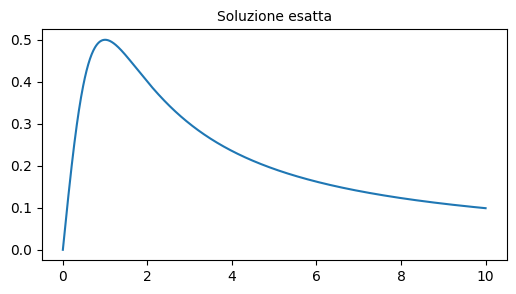

In [4]:
# Es. 3.1 - Plot soluzione esatta
# tempo iniziale e finale
t0, tN = 0, 10
# t per la rappresentazione grafica
tplot = np.linspace(t0, tN, 1000)
# soluzione esatta
yesatta = lambda t: t/(1.0+t**2)

plt.figure(figsize = (6,3))
plt.plot(tplot, yesatta(tplot))
plt.title("Soluzione esatta", fontsize = 10)
plt.show()

<mark>**Esercizio 3.2**</mark></br> Approssimare la soluzione del problema utilizzando il metodo di *Eulero in avanti*, prima con $h=0.2$  e poi con  $h=0.05$. Confrontare graficamente le soluzioni numeriche con la soluzione esatta;

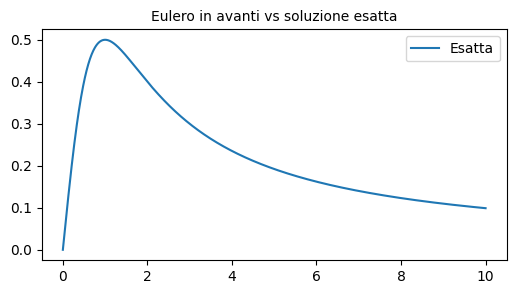

In [5]:
# Es. 3.2 - Eulero in avanti per h = 0.2, 0.05
# dato iniziale
y0 = 0
# funzione f del problema di cauchy che dipende dal tempo e dalla y
f = lambda t, y: 1.0/(1+t**2) - 2*y*y


plt.figure(figsize = (6,3))
plt.plot(tplot, yesatta(tplot), label = 'Esatta')
plt.title("Eulero in avanti vs soluzione esatta", fontsize = 10)
plt.legend()
plt.show()

<mark>**Esercizio 3.3**</mark></br>
Ripetere il l'**Esercizio 3.2** utilizzando il metodo di Eulero all'indietro. Come cambiano i risultati?

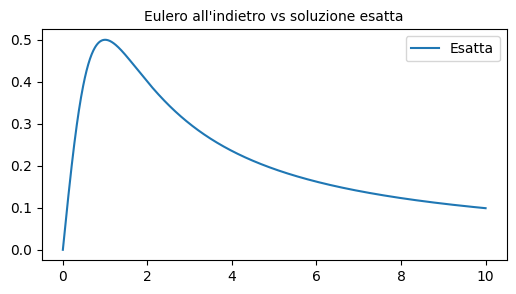

In [6]:
# Es. 3.3 - Eulero all'indietro per h = 0.2, 0.05
# dato iniziale
y0 = 0
# funzione f del problema di cauchy che dipende dal tempo e dalla y
f = lambda t, y: 1.0/(1+t**2) - 2*y*y


plt.figure(figsize = (6,3))
plt.plot(tplot, yesatta(tplot), label = 'Esatta')
plt.title("Eulero all'indietro vs soluzione esatta", fontsize = 10)
plt.legend()
plt.show()

<mark>**Esercizio 3.4**</mark></br>
I confronti grafici sono molto utili, ma è altrettanto utile avere un riscontro quantitativo. Per valutare la bontà dell'approssimazione $u_n\approx y(t_n)$ sull'intera griglia temporale, si può calcolare l'errore globale
</br>
$$e_{h}=\max_{n=0,\dots,N}\;|y(t_{n})-u_{n}|,$$
</br>
dove $e=e_h$ enfatizza il fatto che l'errore dipende dal passo scelto $h>0$. Calcolare l'errore globale per i metodi di Eulero in avanti e all'indietro quando $h=0.2,0.05$.


In [7]:
# Es. 3.4 - Errori globali a confronto







<mark>**Esercizio 3.5**</mark></br>  Calcolare gli errori $e_{h}$ al variare di $h=0.2, 0.1, 0.05, 0.025, 0.0125$, quindi rappresentarne l'andamento utilizzando un opportuno plot in scala logaritmica. I risultati sono coerenti con la teoria?

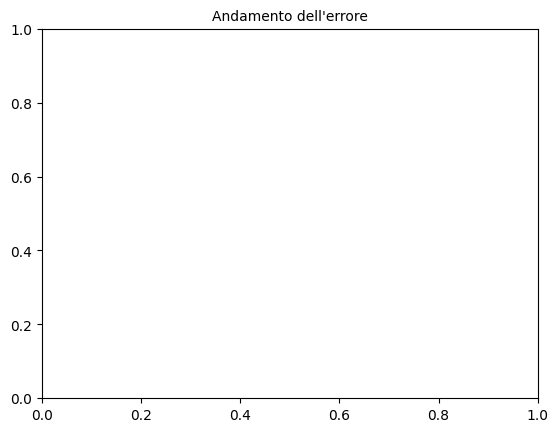

In [8]:
# Es. 3.5 - Ordini di convergenza
# passo h ed errori


plt.title("Andamento dell'errore", fontsize = 10)
plt.show()



<mark>**Esercizio 3.6**</mark></br>
Risolvere il problema con i metodi di Eulero in avanti e di Eulero all'indietro, scegliendo un passo h=1. Riportare su grafici differenti le soluzioni numeriche ottenute, confrontandole con la soluzione esatta e calcolare gli errori ottenuti. Cosa si osserva?


In [9]:
# Es. 3.6 - Confronto tra il metodo di Eulero esplicito e il metodo di Eulero implicito con h=1
# Eulero in avanti con passo h=1

# Eulero all'indietro con passo h=1

# rappresentazione grafica plot

# stampa degli errori

# Esercizi per casa

<mark>**Esercizio 4**</mark></br>
In generale, il metodo di Eulero all'indietro è più oneroso (computazionalmente parlando) rispetto alla sua variante in avanti. In aggiunta, più $h$ è piccolo, e più la simulazione richiede tempo (bisogna fare più passi!). Per quantificare tutto ciò, provare a misurare il tempo d'esecuzione richiesto dai due metodi al variare di $h$.
</br>
</br>
*Hint: potete usare la funzione* $\verb|perf_counter|$ *del pacchetto* $\verb|time|$ *per misurare i tempi d'esecuzione del calcolatore.*


In [10]:
from time import perf_counter


<mark>**Esercizio 5**</mark></br>
Un ulteriore metodo *implicito* ad un passo (*one-step*) è il metodo di Crank-Nicolson che possiede il seguente schema iterativo
</br></br>
$$\begin{cases}
u_{0}=y_{0}\\u_{n+1}=u_{n}+\frac{h}{2}[f(t_{n},u_{n}) +f(t_{n+1},u_{n+1})] & n=0,\dots,N-1.
\end{cases}$$
</br>
A differenza dei metodi di Eulero in avanti e di Eulero all'indietro, che hanno convergenza lineare questo metodo ha un andamento quadratico.

Considerando sempre il problema di Cauchy
</br></br>
$$\begin{cases}
\displaystyle
y'(t)=\frac{1}{1+t^2}-2y(t)^2 & 0\le t\le 10,\\ y(0)=0,
\end{cases}
$$
</br>

la cui soluzione esatta è
$$y(t)=\frac{t}{1+t^{2}}.$$

Calcolare gli errori </br>
$$e_{h}=\max_{n=0,\dots,N}\;|y(t_{n})-u_{n}|,$$
al variare di $h=0.2, 0.1, 0.05, 0.025, 0.0125$ e rappresentarne l'andamento utilizzando un opportuno plot in scala logaritmica. I risultati sono coerenti con la teoria?